https://data-science-blog.com/blog/2022/04/11/how-to-choose-the-best-pre-trained-model-for-your-convolutional-neural-network/
https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/

![test](data\train\Dominik\augmented_image_0.jpg)

In [2]:
%pip install fast_ml

  Using cached fast_ml-3.68-py3-none-any.whl (42 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install -U efficientnet


  Using cached efficientnet-1.1.1-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
# import the necessary packages
import os
import zipfile
# import matplotlib as plt
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import glob

# from pyimagesearch.resnet import ResNet
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import layers, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense
#from keras import optimizers
from tensorflow.keras import optimizers

from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array, array_to_img
from matplotlib import pyplot
import efficientnet.keras as efn

from tensorflow.keras.applications.vgg16 import VGG16

import matplotlib.pyplot as plt
import numpy as np
import glob
import zipfile
import numpy as np
from keras.preprocessing import image
import glob, random
import pandas as pd
from sklearn.model_selection import train_test_split


In [6]:
# https://qmul-tinyface.github.io/
# selet 500 random images from the tinyface Dataset
# from that dataset get the Gallery_Match folder from the Testing_set because its the samllest folder
# C:\Users\domin\Documents\Studium\Master\Deep-Learning\Projekt\tinyface\Testing_Set\Gallery_Match


random_image_path =[]
random_resized = []
file_path_type = [r"C:\Users\domin\Documents\Studium\Master\Deep-Learning\Projekt\tinyface\Testing_Set\Gallery_Match/*.jpg"]

for i in range(500):
    images = glob.glob(random.choice(file_path_type))
    random_image_path.append(random.choice(images))

for i in range(len(random_image_path)): #assuming gif
    random_images = image.load_img(random_image_path[i])
    random_resized.append(random_images.resize([224,224]))
    #random_resized.save(r'data\dataset\unknown\random_image_' +str(i) +'.jpg', 'JPEG')


In [7]:
image_path =[]
dominik_resized = []
file_path_type = [r"C:\Users\domin\Documents\Studium\Master\Deep-Learning\Projekt\Datensatz\Dominik/*.jpeg"]

for i in range(500):
    images = glob.glob(random.choice(file_path_type))
    image_path.append(random.choice(images))

for i in range(len(image_path)): #assuming gif
    dominik_images = image.load_img(image_path[i])
    dominik_resized.append(dominik_images.resize([224,224]))

    #dominik_resized[i].save(r'data\dataset\Dominik\image_' +str(i) +'.jpg', 'JPEG')


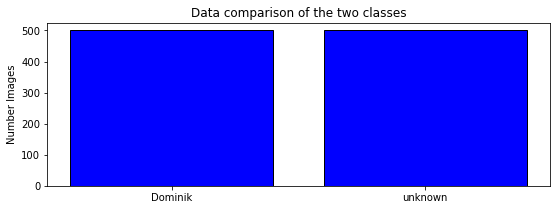

In [8]:
names = ['Dominik', 'unknown']
values = [len(dominik_resized), len(random_resized)]

plt.figure(figsize=(9, 3))
plt.bar(names, values, color='blue',edgecolor='black')
plt.ylabel('Number Images')
plt.title('Data comparison of the two classes')
plt.show()

In [9]:
# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
y_unknown = []
for i in range(len(random_resized)):
    y_unknown.append('unknown')

y_dominik = []
for i in range(len(dominik_resized)):
    y_dominik.append('Dominik')

# In the first step we will split the data in training and remaining dataset
X_train_unknown, X_rem_unknown, y_train_unknown, y_rem_unknown = train_test_split(random_resized,y_unknown, train_size=0.7)
X_train_dominik, X_rem_dominik, y_train_dominik, y_rem_dominik = train_test_split(dominik_resized,y_dominik, train_size=0.7)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
X_valid_unknown, X_test_unknown, y_valid_unknown, y_test_unknown = train_test_split(X_rem_unknown,y_rem_unknown, test_size=0.5)
X_valid_dominik, X_test_dominik, y_valid__dominik, y_test__dominik = train_test_split(X_rem_dominik,y_rem_dominik, test_size=0.5)

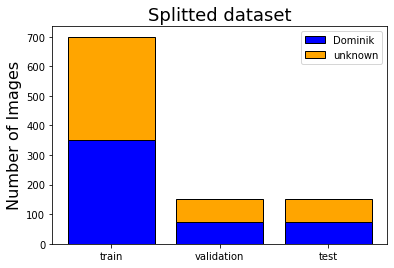

In [10]:
split=['train', 'validation', 'test']
data_origin=['Dominik','unknown']
pos = np.arange(len(split))
vales_dominik = [len(X_train_dominik), len(X_valid_dominik), len(X_test_dominik)]
values_unknown = [len(X_train_unknown), len(X_valid_unknown), len(X_test_unknown)]

plt.bar(pos,vales_dominik,color='blue',edgecolor='black')
plt.bar(pos,values_unknown,color='orange',edgecolor='black',bottom=vales_dominik)
plt.xticks(pos, split)
plt.ylabel('Number of Images', fontsize=16)
plt.title('Splitted dataset',fontsize=18)
plt.legend(data_origin)
plt.show()

In [63]:
for i in range(len(X_train_unknown)):
    X_train_unknown[i].save(r'data\train\unknown\image_' +str(i) +'.jpg', 'JPEG')
   
for i in range(len(X_valid_unknown)):
    X_valid_unknown[i].save(r'data\validation\unknown\image_' +str(i) +'.jpg', 'JPEG')

for i in range(len(X_test_unknown)):
    X_test_unknown[i].save(r'data\test\unknown\image_' +str(i) +'.jpg', 'JPEG')

In [73]:
for i in range(len(X_train_dominik)):
    X_train_dominik[i].save(r'data\train\Dominik\image_' +str(i) +'.jpg', 'JPEG')
   
for i in range(len(X_valid_dominik)):
    X_valid_dominik[i].save(r'data\validation\Dominik\image_' +str(i) +'.jpg', 'JPEG')

for i in range(len(X_test_dominik)):
    X_test_dominik[i].save(r'data\test\Dominik\image_' +str(i) +'.jpg', 'JPEG')

In [11]:
# X_train_unknown
# X_valid_unknown
# X_train_dominik
# X_valid__dominik
train_unknown_array = []
for i in range(len(X_train_unknown)):
    train_unknown_array.append(np.expand_dims(img_to_array(X_train_unknown[0]),axis=0))

valid_unknown_array = []
for i in range(len(X_valid_unknown)):
    valid_unknown_array.append(np.expand_dims(img_to_array(X_valid_unknown[0]), axis=0))

train_dominik_array = []
for i in range(len(X_train_dominik)):
    train_dominik_array.append(np.expand_dims(img_to_array(X_train_dominik[0]), axis=0))

valid_dominik_array = []
for i in range(len(X_valid_dominik)):
    valid_dominik_array.append(np.expand_dims(img_to_array(X_valid_dominik[0]), axis=0))



In [12]:
train_unknown_datagen = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True ,rotation_range=30, brightness_range=[0.4,1.2], zoom_range=[0.6,1.0], fill_mode='reflect')
validation_unknown_datagen = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True ,rotation_range=30, brightness_range=[0.4,1.2], zoom_range=[0.6,1.0], fill_mode='reflect')
train_dominik_datagen = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True ,rotation_range=30, brightness_range=[0.4,1.2], zoom_range=[0.6,1.0], fill_mode='reflect')
validation_dominik_datagen = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True ,rotation_range=30, brightness_range=[0.4,1.2], zoom_range=[0.6,1.0], fill_mode='reflect')


train_generator_unknown = train_unknown_datagen.flow(train_unknown_array, batch_size = 1)

for i in range(len(train_unknown_array)):
    # generate batch of images
    batch = train_generator_unknown.next()
    squeeze_array = np.squeeze(batch[0], axis=(0))
    im = array_to_img(squeeze_array, scale=False)
    #im.save(r'data\train\unknown\augmented_image_'+ str(i)+ '.jpg')


valid_generator_unknown = validation_unknown_datagen.flow(valid_unknown_array, batch_size = 1)

for i in range(len(valid_unknown_array)):
    # generate batch of images
    batch = valid_generator_unknown.next()
    squeeze_array = np.squeeze(batch[0], axis=(0))
    im = array_to_img(squeeze_array, scale=False)
    #im.save(r'data\validation\unknown\augmented_image_'+ str(i)+ '.jpg')



train_generator_dominik = train_dominik_datagen.flow(train_dominik_array, batch_size = 1)

for i in range(len(train_dominik_array)):
    # generate batch of images
    batch = train_generator_dominik.next()
    squeeze_array = np.squeeze(batch[0], axis=(0))
    im = array_to_img(squeeze_array, scale=False)
    #im.save(r'data\train\Dominik\augmented_image_'+ str(i)+ '.jpg')


valid_generator_dominik = validation_dominik_datagen.flow(valid_dominik_array, batch_size = 1)

for i in range(len(valid_dominik_array)):
    # generate batch of images
    batch = valid_generator_dominik.next()
    squeeze_array = np.squeeze(batch[0], axis=(0))
    im = array_to_img(squeeze_array, scale=False)
    #im.save(r'data\validation\Dominik\augmented_image_'+ str(i)+ '.jpg')


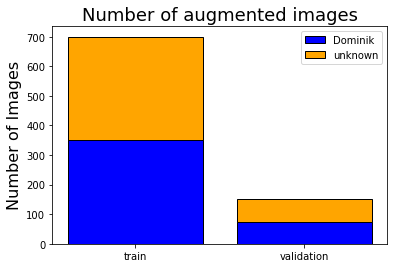

In [13]:
split=['train', 'validation']
data_origin=['Dominik','unknown']
pos = np.arange(len(split))
vales_train = [len(train_dominik_array), len(valid_dominik_array)]
values_valid = [len(train_unknown_array), len(valid_unknown_array)]

plt.bar(pos,vales_train,color='blue',edgecolor='black')
plt.bar(pos,values_valid,color='orange',edgecolor='black',bottom=vales_train)
plt.xticks(pos, split)
plt.ylabel('Number of Images', fontsize=16)
plt.title('Number of augmented images',fontsize=18)
plt.legend(data_origin)
plt.show()

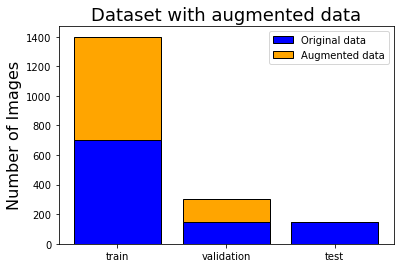

In [14]:
split=['train', 'validation', 'test']
data_origin=['Original data','Augmented data']
pos = np.arange(len(split))
vales_og = [len(train_dominik_array+train_unknown_array), len(valid_dominik_array+valid_unknown_array), len(X_test_unknown+X_test_dominik)]
values_augmented = [len(train_dominik_array+train_unknown_array), len(valid_dominik_array+valid_unknown_array), 0]

plt.bar(pos,vales_og,color='blue',edgecolor='black')
plt.bar(pos,values_augmented,color='orange',edgecolor='black',bottom=vales_og)
plt.xticks(pos, split)
plt.ylabel('Number of Images', fontsize=16)
plt.title('Dataset with augmented data',fontsize=18)
plt.legend(data_origin)
plt.show()

In [ ]:
#load dominik images
images_dominik = []
for filename in glob.glob("dataset/Dominik/" + "*.jpg"): #assuming gif
    im=image.load_img(filename)
   
    #array_list_train.append(img_to_array(im))
    images_dominik.append(np.expand_dims(img_to_array(im), axis=0))
print("list: ", len(images_dominik))


#load unknown images
images_unknown = []
for filename in glob.glob("data/validation/Dominik/" + "*.jpg"): #assuming gif
    im=image.load_img(filename)
    
    #array_list_val.append(img_to_array(im))
    images_unknown.append(np.expand_dims(img_to_array(im), axis=0))
print("list: ", len(images_unknown))

In [13]:
################ Unzip the dataset in the Colab runtime #################

#zip_file_path = "C:/Users/Dominik/Documents/Studium/Master/Deep-Learning/Datensatz.zip"
zip_file_path = r'C:\Users\domin\Documents\Studium\Master\Deep-Learning\Projekt\Datensatz.zip'
pathToZip = os.path.join(zip_file_path)

print("unzipping {}".format(pathToZip))

pathToData = "/tmp/Datensatz"
with zipfile.ZipFile(pathToZip, 'r') as zip_ref:
    zip_ref.extractall(pathToData)

# training images
data    = glob.glob(os.path.join(pathToData, "Datensatz/" + "*.jpeg"))
# test images
#test    = glob.glob(os.path.join(pathToData, "Datensatz/test/" + "*.jpg"))

print(pathToData + "/Datensatz/") #/train
print("train    : {} image paths".format(len(data)))
#print("train    : {} image paths".format(len(test)))


unzipping C:\Users\domin\Documents\Studium\Master\Deep-Learning\Projekt\Datensatz.zip
/tmp/Datensatz/Datensatz/
train    : 535 image paths


In [ ]:
from PIL import Image
import glob
image_list = []
for filename in glob.glob("/tmp/Datensatz/Datensatz/" + "*.jpeg"): #assuming gif
    im=Image.open(filename)
    
    image_list.append(im)

print("list: ", len(image_list))
print(image_list[0])


https://qmul-tinyface.github.io/

In [5]:

samples = []
for i in range(len(image_list)):
        temp_data = img_to_array(image_list[i])
        # normalize image
        # print("data: ", data)
        # normalize image
        img_norm = cv2.normalize(temp_data, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
        
        # print("norm: ", img_norm)
        # expand dimension to one sample
        # samples.append(expand_dims(img_norm, 0))
        samples.append(array_to_img(img_norm))
       


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size=0.8
y = []
samples = image_list
for i in range(len(samples)):
    y.append('Dominik')


# In the first step we will split the data in training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(samples,y, train_size=0.7)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)


In [16]:
X_train_resized = []
X_val_resized = []

for i in range(len(X_train)):
    X_train_resized.append(X_train[i].resize([224,224]))

for i in range(len(X_valid)):
    X_val_resized.append(X_valid[i].resize([224,224]))

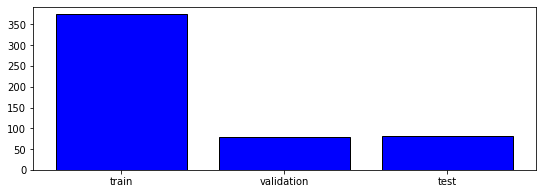

In [17]:
names = ['train', 'validation', 'test']
values = [len(X_train), len(X_valid), len(X_test)]

plt.figure(figsize=(9, 3))
plt.bar(names, values, color='blue',edgecolor='black')
plt.show()

In [18]:
for i in range(len(X_train)):
    X_train_resized[i].save(r'data\train\Dominik\image_' +str(i) +'.jpg', 'JPEG')

    
for i in range(len(X_valid)):
    X_val_resized[i].save(r'data\validation\Dominik\image_' +str(i) +'.jpg', 'JPEG')

for i in range(len(X_test)):
    X_test[i].save(r'data\test\Dominik\image_' +str(i) +'.jpg', 'JPEG')
    

In [69]:
train_datagen = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True ,rotation_range=30, brightness_range=[0.4,1.2], zoom_range=[0.6,1.0], fill_mode='reflect')
validation_datagen = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True ,rotation_range=30, brightness_range=[0.4,1.2], zoom_range=[0.6,1.0], fill_mode='reflect')

path_train = "data/train/"
train_generator = train_datagen.flow_from_directory(path_train, batch_size = 1, target_size = (224, 224))
_, _, files_train = next(os.walk("data/train/Dominik"))
number_augmented_train = len(files_train)*3

for i in range(len(files_train)*3):
    # generate batch of images
    batch = train_generator.next()
    squeeze_array = np.squeeze(batch[0], axis=(0))
    im = array_to_img(squeeze_array, scale=False)
    im.save(r'data\train\Dominik\augmented_image_'+ str(i)+ '.jpg')



path_validation = "data/validation/"
validation_generator = validation_datagen.flow_from_directory(path_validation, batch_size = 1, target_size = (224, 224))
_, _, files_validation = next(os.walk("data/validation/Dominik"))
number_augmented_validation = len(files_validation)*2

for i in range(len(files_validation)*2):
    # generate batch of images
    batch = train_generator.next()
    squeeze_array = np.squeeze(batch[0], axis=(0))
    im = array_to_img(squeeze_array, scale=False)
    im.save(r'data\validation\Dominik\augmented_image_'+ str(i)+ '.jpg')



Found 376 images belonging to 2 classes.
Found 81 images belonging to 2 classes.


In [15]:
# Step 2: Loading the Base Model
base_model = efn.EfficientNetB0(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

In [16]:
# Again, let us freeze the layers:
for layer in base_model.layers:
    layer.trainable = False

In [17]:
# Step 3: Build the model

x = base_model.output
y = base_model.input
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
predictions = Dense(1, activation="sigmoid")(x)
model_final = Model(y, predictions) #base_model.input

In [18]:
# Step 4: Compile and Fit

model_final.compile(optimizers.RMSprop(lr=0.0001, decay=1e-6),loss='binary_crossentropy',metrics=['accuracy'])

c:\Users\domin\anaconda3\envs\tensorflow1\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Batch-Size: Think of a batch as a for-loop iterating over one or more samples and making predictions. At the end of the batch, the    predictions are compared to the expected output variables and an error is calculated. From this error, the update algorithm is used to improve the model, e.g. move down along the error gradient.
-What if the dataset does not divide evenly by the batch size?
    --> This can and does happen often when training a model. It simply means that the final batch has fewer samples than the other batches.

Epochen: The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.

One epoch means that each sample in the training dataset has had an opportunity to update the internal model parameters. An epoch is comprised of one or more batches. For example, as above, an epoch that has one batch is called the batch gradient descent learning algorithm.

You can think of a for-loop over the number of epochs where each loop proceeds over the training dataset. Within this for-loop is another nested for-loop that iterates over each batch of samples, where one batch has the specified “batch size” number of samples.

The batch size is a number of samples processed before the model is updated.

The number of epochs is the number of complete passes through the training dataset.


Steps_per_epoch: Total number of steps (batches of samples)
            before declaring one epoch finished and starting the
            next epoch. When training with input tensors such as
            TensorFlow data tensors, the default `None` is equal to
            the number of samples in your dataset divided by
            the batch size, or 1 if that cannot be determined. If x is a
            `tf.data` dataset, and 'steps_per_epoch'
            is None, the epoch will run until the input dataset is exhausted.
            When passing an infinitely repeating dataset, you must specify the
            `steps_per_epoch` argument.

In [58]:


train_arr = []
for filename in glob.glob("data/train/Dominik/" + "*.jpg"): #assuming gif
    im=image.load_img(filename)
   
    #array_list_train.append(img_to_array(im))
    train_arr.append(np.expand_dims(img_to_array(im), axis=0))
print("list: ", len(train_arr))




val_arr = []
for filename in glob.glob("data/validation/Dominik/" + "*.jpg"): #assuming gif
    im=image.load_img(filename)
    
    #array_list_val.append(img_to_array(im))
    val_arr.append(np.expand_dims(img_to_array(im), axis=0))
print("list: ", len(val_arr))
print(val_arr[0].shape)


list:  1496
list:  240
(1, 224, 224, 3)


In [11]:
train_dir = "data/train/"
train_datagen = ImageDataGenerator()
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

val_dir = "data/validation/"
val_datagen = ImageDataGenerator()
val_generator = val_datagen.flow_from_directory(val_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))


Found 1400 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [38]:
eff_history = model_final.fit(train_generator, validation_data = val_generator, steps_per_epoch = 60, epochs = 20)

Epoch 1/20
60/60 [==============================] - 16s 259ms/step - loss: 0.8361 - accuracy: 0.7050 - val_loss: 1.8449 - val_accuracy: 0.5767
Epoch 2/20
60/60 [==============================] - 15s 258ms/step - loss: 1.2195 - accuracy: 0.7250 - val_loss: 1.9367 - val_accuracy: 0.5867
Epoch 3/20
60/60 [==============================] - 18s 295ms/step - loss: 1.0421 - accuracy: 0.7342 - val_loss: 1.3575 - val_accuracy: 0.5633
Epoch 4/20
60/60 [==============================] - 17s 286ms/step - loss: 1.4807 - accuracy: 0.7092 - val_loss: 1.4359 - val_accuracy: 0.5467
Epoch 5/20
60/60 [==============================] - 17s 278ms/step - loss: 2.1536 - accuracy: 0.7242 - val_loss: 3.1649 - val_accuracy: 0.6100
Epoch 6/20
60/60 [==============================] - 18s 300ms/step - loss: 1.8026 - accuracy: 0.6883 - val_loss: 1.2143 - val_accuracy: 0.5800
Epoch 7/20
60/60 [==============================] - 16s 269ms/step - loss: 1.7284 - accuracy: 0.7275 - val_loss: 3.4647 - val_accuracy: 0.5667

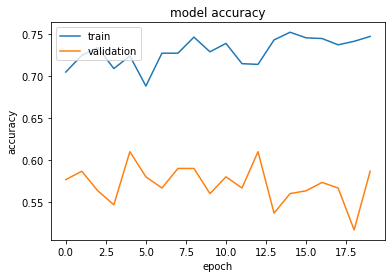

In [39]:
def plot_hist(eff_history):
    plt.plot(eff_history.history["accuracy"])
    plt.plot(eff_history.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(eff_history)

In [46]:
# predicting images
img = image.load_img(r'data\test\unknown\image_60.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model_final.predict(images, batch_size=10)
print(classes)

[[0.08831871]]


In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from keras.models import Sequential

In [16]:
dnn_model = Sequential()

In [17]:
imported_model= tf.keras.applications.ResNet50(include_top=False,
input_shape=(240,240,3),
pooling='avg',classes=2,
weights='imagenet')
for layer in imported_model.layers:
    layer.trainable=False

In [18]:
dnn_model.add(imported_model)
dnn_model.add(Flatten())
dnn_model.add(Dense(512, activation='relu'))
dnn_model.add(Dense(5, activation='softmax'))

In [8]:
dnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               1049088   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 2565      
Total params: 24,639,365
Trainable params: 1,051,653
Non-trainable params: 23,587,712
_________________________________________________________________


In [19]:
from tensorflow.keras.optimizers import Adam
dnn_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

c:\Users\domin\anaconda3\envs\tensorflow1\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [9]:
train_set = []
for img in glob.glob("data/train/Dominik/*.jpg"):
    im = image.load_img(img, target_size=(224, 224))
    x = image.img_to_array(im)
    train_set.append(image.img_to_array(im))
    #train_set.append(np.expand_dims(x, axis=0))

for img in glob.glob("data/train/unknown/*.jpg"):
    im = image.load_img(img, target_size=(224, 224))
    x = image.img_to_array(im)
    train_set.append(image.img_to_array(im))
    #train_set.append(np.expand_dims(x, axis=0))

    
    

valid_set = []
for img in glob.glob("data/validation/Dominik/*.jpg"):
    im = image.load_img(img, target_size=(224, 224))
    x = image.img_to_array(im)
    valid_set.append(image.img_to_array(im))
    #valid_set.append(np.expand_dims(x, axis=0))

for img in glob.glob("data/validation/unknown/*.jpg"):
    im = image.load_img(img, target_size=(224, 224))
    x = image.img_to_array(im)
    valid_set.append(image.img_to_array(im))
    #valid_set.append(np.expand_dims(x, axis=0))


In [20]:
history = dnn_model.fit(
train_set,
validation_data=valid_set,
epochs=10
)

Epoch 1/10


ValueError: in user code:

    c:\Users\domin\anaconda3\envs\tensorflow1\lib\site-packages\tensorflow\python\keras\engine\training.py:855 train_function  *
        return step_function(self, iterator)
    c:\Users\domin\anaconda3\envs\tensorflow1\lib\site-packages\tensorflow\python\keras\engine\training.py:845 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\Users\domin\anaconda3\envs\tensorflow1\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\Users\domin\anaconda3\envs\tensorflow1\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\Users\domin\anaconda3\envs\tensorflow1\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\Users\domin\anaconda3\envs\tensorflow1\lib\site-packages\tensorflow\python\keras\engine\training.py:838 run_step  **
        outputs = model.train_step(data)
    c:\Users\domin\anaconda3\envs\tensorflow1\lib\site-packages\tensorflow\python\keras\engine\training.py:795 train_step
        y_pred = self(x, training=True)
    c:\Users\domin\anaconda3\envs\tensorflow1\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    c:\Users\domin\anaconda3\envs\tensorflow1\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:200 assert_input_compatibility
        raise ValueError('Layer ' + layer_name + ' expects ' +

    ValueError: Layer sequential_1 expects 1 input(s), but it received 1400 input tensors. Inputs received: [<tf.Tensor 'IteratorGetNext:0' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:2' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:3' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:4' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:5' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:6' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:7' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:8' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:9' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:10' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:11' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:12' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:13' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:14' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:15' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:16' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:17' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:18' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:19' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:20' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:21' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:22' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:23' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:24' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:25' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:26' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:27' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:28' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:29' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:30' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:31' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:32' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:33' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:34' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:35' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:36' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:37' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:38' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:39' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:40' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:41' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:42' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:43' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:44' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:45' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:46' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:47' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:48' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:49' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:50' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:51' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:52' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:53' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:54' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:55' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:56' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:57' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:58' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:59' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:60' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:61' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:62' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:63' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:64' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:65' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:66' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:67' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:68' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:69' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:70' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:71' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:72' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:73' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:74' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:75' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:76' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:77' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:78' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:79' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:80' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:81' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:82' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:83' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:84' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:85' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:86' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:87' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:88' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:89' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:90' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:91' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:92' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:93' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:94' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:95' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:96' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:97' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:98' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:99' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:100' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:101' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:102' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:103' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:104' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:105' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:106' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:107' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:108' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:109' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:110' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:111' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:112' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:113' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:114' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:115' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:116' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:117' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:118' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:119' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:120' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:121' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:122' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:123' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:124' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:125' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:126' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:127' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:128' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:129' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:130' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:131' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:132' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:133' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:134' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:135' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:136' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:137' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:138' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:139' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:140' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:141' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:142' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:143' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:144' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:145' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:146' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:147' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:148' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:149' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:150' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:151' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:152' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:153' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:154' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:155' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:156' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:157' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:158' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:159' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:160' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:161' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:162' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:163' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:164' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:165' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:166' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:167' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:168' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:169' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:170' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:171' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:172' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:173' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:174' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:175' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:176' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:177' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:178' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:179' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:180' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:181' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:182' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:183' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:184' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:185' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:186' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:187' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:188' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:189' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:190' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:191' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:192' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:193' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:194' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:195' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:196' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:197' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:198' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:199' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:200' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:201' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:202' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:203' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:204' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:205' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:206' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:207' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:208' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:209' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:210' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:211' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:212' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:213' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:214' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:215' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:216' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:217' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:218' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:219' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:220' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:221' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:222' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:223' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:224' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:225' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:226' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:227' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:228' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:229' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:230' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:231' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:232' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:233' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:234' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:235' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:236' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:237' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:238' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:239' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:240' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:241' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:242' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:243' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:244' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:245' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:246' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:247' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:248' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:249' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:250' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:251' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:252' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:253' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:254' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:255' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:256' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:257' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:258' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:259' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:260' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:261' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:262' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:263' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:264' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:265' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:266' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:267' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:268' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:269' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:270' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:271' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:272' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:273' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:274' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:275' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:276' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:277' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:278' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:279' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:280' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:281' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:282' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:283' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:284' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:285' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:286' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:287' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:288' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:289' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:290' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:291' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:292' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:293' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:294' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:295' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:296' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:297' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:298' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:299' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:300' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:301' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:302' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:303' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:304' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:305' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:306' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:307' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:308' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:309' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:310' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:311' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:312' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:313' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:314' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:315' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:316' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:317' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:318' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:319' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:320' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:321' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:322' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:323' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:324' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:325' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:326' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:327' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:328' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:329' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:330' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:331' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:332' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:333' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:334' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:335' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:336' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:337' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:338' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:339' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:340' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:341' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:342' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:343' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:344' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:345' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:346' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:347' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:348' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:349' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:350' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:351' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:352' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:353' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:354' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:355' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:356' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:357' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:358' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:359' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:360' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:361' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:362' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:363' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:364' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:365' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:366' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:367' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:368' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:369' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:370' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:371' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:372' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:373' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:374' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:375' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:376' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:377' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:378' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:379' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:380' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:381' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:382' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:383' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:384' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:385' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:386' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:387' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:388' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:389' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:390' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:391' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:392' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:393' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:394' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:395' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:396' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:397' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:398' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:399' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:400' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:401' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:402' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:403' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:404' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:405' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:406' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:407' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:408' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:409' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:410' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:411' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:412' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:413' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:414' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:415' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:416' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:417' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:418' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:419' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:420' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:421' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:422' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:423' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:424' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:425' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:426' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:427' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:428' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:429' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:430' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:431' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:432' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:433' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:434' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:435' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:436' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:437' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:438' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:439' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:440' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:441' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:442' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:443' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:444' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:445' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:446' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:447' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:448' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:449' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:450' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:451' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:452' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:453' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:454' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:455' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:456' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:457' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:458' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:459' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:460' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:461' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:462' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:463' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:464' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:465' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:466' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:467' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:468' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:469' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:470' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:471' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:472' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:473' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:474' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:475' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:476' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:477' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:478' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:479' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:480' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:481' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:482' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:483' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:484' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:485' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:486' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:487' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:488' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:489' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:490' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:491' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:492' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:493' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:494' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:495' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:496' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:497' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:498' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:499' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:500' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:501' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:502' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:503' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:504' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:505' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:506' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:507' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:508' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:509' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:510' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:511' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:512' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:513' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:514' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:515' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:516' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:517' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:518' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:519' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:520' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:521' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:522' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:523' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:524' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:525' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:526' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:527' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:528' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:529' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:530' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:531' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:532' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:533' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:534' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:535' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:536' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:537' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:538' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:539' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:540' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:541' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:542' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:543' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:544' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:545' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:546' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:547' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:548' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:549' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:550' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:551' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:552' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:553' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:554' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:555' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:556' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:557' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:558' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:559' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:560' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:561' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:562' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:563' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:564' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:565' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:566' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:567' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:568' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:569' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:570' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:571' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:572' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:573' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:574' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:575' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:576' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:577' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:578' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:579' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:580' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:581' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:582' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:583' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:584' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:585' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:586' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:587' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:588' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:589' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:590' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:591' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:592' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:593' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:594' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:595' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:596' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:597' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:598' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:599' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:600' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:601' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:602' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:603' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:604' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:605' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:606' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:607' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:608' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:609' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:610' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:611' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:612' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:613' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:614' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:615' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:616' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:617' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:618' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:619' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:620' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:621' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:622' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:623' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:624' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:625' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:626' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:627' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:628' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:629' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:630' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:631' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:632' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:633' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:634' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:635' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:636' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:637' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:638' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:639' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:640' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:641' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:642' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:643' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:644' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:645' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:646' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:647' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:648' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:649' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:650' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:651' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:652' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:653' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:654' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:655' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:656' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:657' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:658' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:659' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:660' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:661' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:662' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:663' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:664' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:665' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:666' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:667' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:668' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:669' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:670' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:671' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:672' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:673' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:674' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:675' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:676' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:677' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:678' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:679' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:680' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:681' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:682' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:683' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:684' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:685' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:686' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:687' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:688' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:689' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:690' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:691' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:692' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:693' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:694' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:695' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:696' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:697' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:698' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:699' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:700' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:701' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:702' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:703' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:704' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:705' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:706' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:707' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:708' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:709' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:710' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:711' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:712' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:713' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:714' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:715' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:716' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:717' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:718' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:719' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:720' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:721' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:722' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:723' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:724' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:725' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:726' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:727' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:728' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:729' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:730' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:731' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:732' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:733' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:734' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:735' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:736' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:737' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:738' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:739' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:740' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:741' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:742' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:743' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:744' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:745' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:746' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:747' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:748' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:749' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:750' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:751' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:752' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:753' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:754' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:755' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:756' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:757' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:758' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:759' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:760' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:761' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:762' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:763' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:764' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:765' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:766' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:767' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:768' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:769' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:770' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:771' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:772' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:773' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:774' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:775' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:776' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:777' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:778' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:779' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:780' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:781' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:782' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:783' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:784' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:785' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:786' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:787' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:788' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:789' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:790' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:791' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:792' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:793' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:794' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:795' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:796' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:797' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:798' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:799' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:800' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:801' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:802' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:803' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:804' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:805' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:806' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:807' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:808' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:809' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:810' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:811' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:812' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:813' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:814' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:815' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:816' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:817' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:818' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:819' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:820' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:821' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:822' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:823' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:824' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:825' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:826' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:827' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:828' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:829' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:830' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:831' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:832' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:833' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:834' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:835' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:836' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:837' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:838' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:839' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:840' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:841' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:842' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:843' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:844' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:845' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:846' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:847' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:848' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:849' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:850' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:851' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:852' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:853' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:854' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:855' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:856' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:857' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:858' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:859' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:860' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:861' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:862' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:863' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:864' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:865' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:866' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:867' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:868' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:869' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:870' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:871' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:872' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:873' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:874' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:875' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:876' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:877' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:878' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:879' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:880' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:881' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:882' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:883' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:884' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:885' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:886' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:887' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:888' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:889' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:890' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:891' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:892' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:893' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:894' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:895' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:896' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:897' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:898' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:899' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:900' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:901' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:902' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:903' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:904' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:905' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:906' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:907' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:908' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:909' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:910' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:911' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:912' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:913' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:914' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:915' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:916' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:917' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:918' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:919' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:920' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:921' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:922' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:923' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:924' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:925' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:926' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:927' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:928' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:929' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:930' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:931' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:932' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:933' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:934' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:935' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:936' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:937' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:938' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:939' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:940' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:941' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:942' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:943' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:944' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:945' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:946' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:947' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:948' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:949' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:950' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:951' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:952' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:953' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:954' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:955' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:956' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:957' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:958' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:959' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:960' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:961' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:962' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:963' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:964' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:965' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:966' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:967' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:968' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:969' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:970' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:971' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:972' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:973' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:974' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:975' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:976' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:977' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:978' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:979' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:980' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:981' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:982' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:983' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:984' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:985' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:986' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:987' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:988' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:989' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:990' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:991' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:992' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:993' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:994' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:995' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:996' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:997' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:998' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:999' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1000' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1001' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1002' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1003' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1004' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1005' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1006' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1007' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1008' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1009' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1010' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1011' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1012' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1013' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1014' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1015' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1016' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1017' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1018' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1019' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1020' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1021' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1022' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1023' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1024' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1025' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1026' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1027' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1028' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1029' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1030' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1031' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1032' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1033' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1034' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1035' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1036' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1037' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1038' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1039' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1040' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1041' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1042' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1043' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1044' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1045' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1046' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1047' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1048' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1049' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1050' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1051' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1052' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1053' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1054' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1055' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1056' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1057' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1058' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1059' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1060' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1061' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1062' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1063' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1064' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1065' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1066' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1067' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1068' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1069' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1070' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1071' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1072' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1073' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1074' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1075' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1076' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1077' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1078' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1079' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1080' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1081' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1082' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1083' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1084' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1085' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1086' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1087' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1088' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1089' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1090' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1091' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1092' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1093' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1094' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1095' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1096' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1097' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1098' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1099' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1100' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1101' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1102' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1103' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1104' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1105' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1106' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1107' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1108' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1109' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1110' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1111' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1112' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1113' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1114' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1115' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1116' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1117' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1118' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1119' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1120' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1121' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1122' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1123' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1124' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1125' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1126' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1127' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1128' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1129' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1130' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1131' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1132' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1133' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1134' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1135' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1136' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1137' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1138' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1139' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1140' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1141' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1142' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1143' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1144' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1145' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1146' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1147' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1148' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1149' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1150' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1151' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1152' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1153' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1154' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1155' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1156' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1157' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1158' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1159' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1160' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1161' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1162' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1163' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1164' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1165' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1166' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1167' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1168' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1169' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1170' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1171' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1172' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1173' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1174' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1175' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1176' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1177' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1178' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1179' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1180' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1181' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1182' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1183' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1184' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1185' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1186' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1187' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1188' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1189' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1190' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1191' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1192' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1193' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1194' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1195' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1196' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1197' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1198' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1199' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1200' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1201' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1202' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1203' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1204' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1205' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1206' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1207' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1208' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1209' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1210' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1211' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1212' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1213' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1214' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1215' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1216' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1217' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1218' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1219' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1220' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1221' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1222' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1223' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1224' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1225' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1226' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1227' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1228' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1229' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1230' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1231' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1232' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1233' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1234' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1235' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1236' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1237' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1238' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1239' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1240' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1241' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1242' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1243' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1244' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1245' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1246' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1247' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1248' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1249' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1250' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1251' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1252' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1253' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1254' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1255' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1256' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1257' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1258' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1259' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1260' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1261' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1262' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1263' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1264' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1265' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1266' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1267' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1268' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1269' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1270' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1271' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1272' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1273' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1274' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1275' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1276' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1277' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1278' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1279' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1280' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1281' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1282' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1283' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1284' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1285' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1286' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1287' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1288' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1289' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1290' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1291' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1292' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1293' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1294' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1295' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1296' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1297' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1298' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1299' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1300' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1301' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1302' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1303' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1304' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1305' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1306' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1307' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1308' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1309' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1310' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1311' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1312' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1313' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1314' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1315' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1316' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1317' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1318' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1319' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1320' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1321' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1322' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1323' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1324' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1325' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1326' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1327' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1328' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1329' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1330' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1331' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1332' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1333' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1334' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1335' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1336' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1337' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1338' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1339' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1340' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1341' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1342' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1343' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1344' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1345' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1346' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1347' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1348' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1349' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1350' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1351' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1352' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1353' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1354' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1355' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1356' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1357' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1358' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1359' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1360' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1361' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1362' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1363' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1364' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1365' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1366' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1367' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1368' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1369' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1370' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1371' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1372' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1373' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1374' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1375' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1376' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1377' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1378' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1379' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1380' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1381' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1382' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1383' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1384' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1385' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1386' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1387' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1388' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1389' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1390' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1391' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1392' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1393' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1394' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1395' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1396' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1397' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1398' shape=(32, 224, 3) dtype=float32>, <tf.Tensor 'IteratorGetNext:1399' shape=(32, 224, 3) dtype=float32>]


In [15]:
# Importing OpenCV package
import cv2
  
# Reading the image
img = cv2.imread('Photos/cric4.jpg')
  
# Converting image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Loading the required haar-cascade xml classifier file
haar_cascade = cv2.CascadeClassifier('Haarcascade_frontalface_default.xml')
  
# Applying the face detection method on the grayscale image
faces_rect = haar_cascade.detectMultiScale(gray_img, 1.1, 9)
  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
  
cv2.imshow('Detected faces', img)
  
cv2.waitKey(0)

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
